In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv(r"synthetic-it-call-center-tickets.csv")
df.sample(5)

,Unnamed: 0,number,type,date,contact_type,short_description,content,category,subcategory,customer,...,resolution_time,issue/request,software/system,output,assignment_group,item_id,role,poor_close_notes,info_score_close_notes,info_score_poor_close_notes
18539,18539,INC0049672,Incident,2/13/2021 13:25,Email,Resolving connectivity disruptions post-certif...,We have a critical situation involving a custo...,SOFTWARE,ERROR,"Clark, Jessica",...,1573.961104,Certificate management complications leading t...,Ping Identity,Software/System: Ping Identity ; Issue/Request...,NaN,12783,agent,The connectivity issues related to the SSL cer...,0.9,0.2
6136,6136,INC001893,Incident,3/4/2021 16:39,Phone,Zoho CRM Problem,The client is unable to access Zoho CRM and is...,SOFTWARE,ERROR,"Hall, Logan",...,29743.055140,Error - FATAL: Disk quota exceeded. Cannot wri...,Zoho CRM,Software/System: Zoho CRM ; Issue/Request: Err...,TIER 2 TEAM,9114,agent,Issue resolved. The client can now access Zoho...,0.8,0.1
24014,24014,INC0039689,Incident,2/3/2021 10:33,Self-service,DataDive application crashes on save action,Every time I try to save something in DataDive...,SOFTWARE,ERROR,"Brown, Samantha",...,198.760000,DataDive Crashing When Saving Files,DataDive,Software/System: DataDive ; Issue/Request: Dat...,SOFTWARE DEVELOPMENT,2829,customer,Issue Resolved,0.9,0.0
21236,21236,INC0022347,Incident,3/19/2021 13:13,Email,Customer can't access authentication server,The customer reported problems accessing the R...,SOFTWARE,ERROR,"Walker, Timothy",...,3948.581275,Authentication server connectivity issues,RSA SecureID,Software/System: RSA SecureID ; Issue/Request:...,NaN,12801,agent,Issue resolved. Customer can access the authen...,0.8,0.1
22821,22821,INC0044517,Incident,1/6/2021 15:16,Self-service,Significant lag during Azure Virtual Desktop l...,"Hello, I am reaching out because I've noticed ...",SOFTWARE,ERROR,"Ortiz, Theresa",...,1005.896774,Slow user login times,Azure Virtual Desktop,Software/System: Azure Virtual Desktop ; Issue...,NaN,12620,customer,Issue resolved. User can log in now.,0.8,0.0


In [74]:
df.isnull().sum()

Unnamed: 0                        0
number                            0
type                              0
date                              0
contact_type                      0
short_description                 0
content                           0
category                          3
subcategory                       3
customer                          0
resolved_at                    6925
close_notes                     353
agent                           362
reassigned_count                  0
resolution_time                   0
issue/request                     0
software/system                   0
output                            0
assignment_group               6590
item_id                           0
role                              0
poor_close_notes                  0
info_score_close_notes          353
info_score_poor_close_notes     353
dtype: int64

In [75]:
df.dropna(inplace=True)
df.drop_duplicates(subset=['short_description', 'close_notes'], inplace=True)


In [76]:
print(df.columns)

Index(['Unnamed: 0', 'number', 'type', 'date', 'contact_type',
       'short_description', 'content', 'category', 'subcategory', 'customer',
       'resolved_at', 'close_notes', 'agent', 'reassigned_count',
       'resolution_time', 'issue/request', 'software/system', 'output',
       'assignment_group', 'item_id', 'role', 'poor_close_notes',
       'info_score_close_notes', 'info_score_poor_close_notes'],
      dtype='object')


In [77]:
#those are the only columns we need
df = df[['short_description','close_notes']]


c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


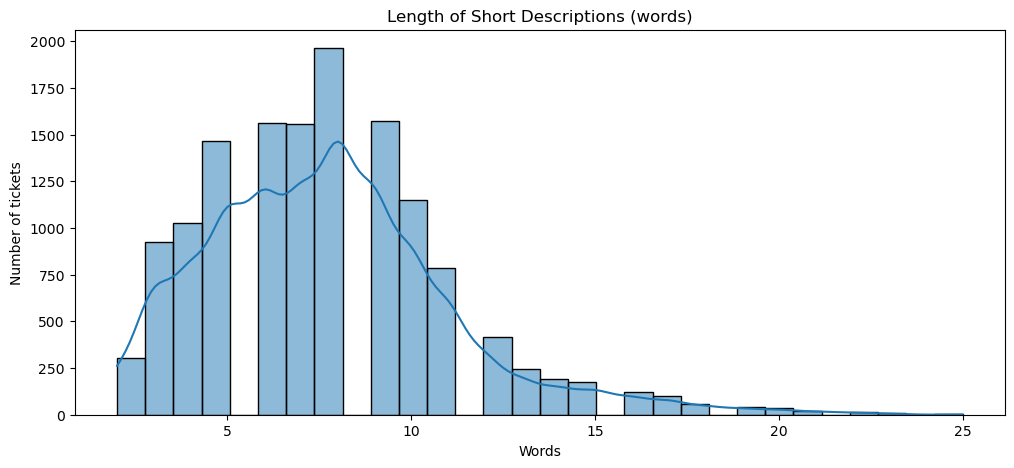

In [78]:
df['desc_len'] = df['short_description'].str.split().apply(len)

plt.figure(figsize=(12,5))
sns.histplot(df['desc_len'], bins=30, kde=True)
plt.title('Length of Short Descriptions (words)')
plt.xlabel('Words')
plt.ylabel('Number of tickets')
plt.show()


c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


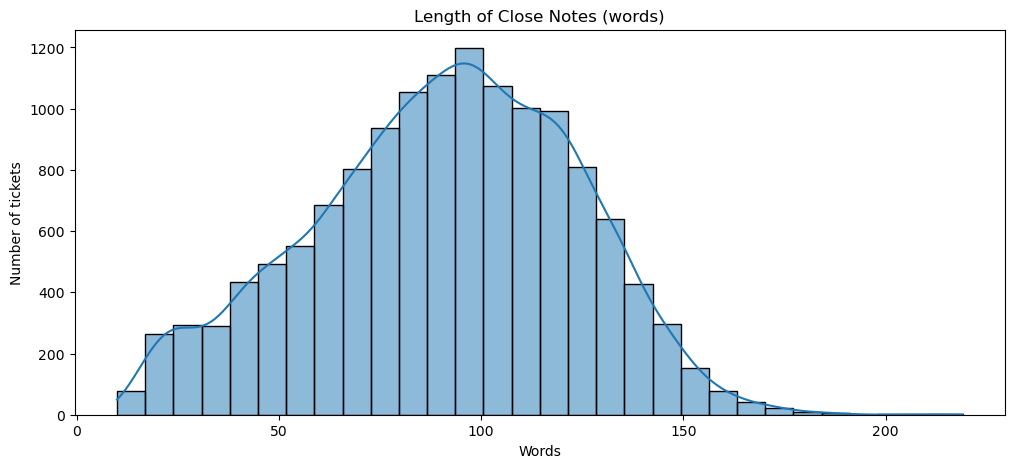

In [79]:
df['note_len'] = df['close_notes'].str.split().apply(len)

plt.figure(figsize=(12,5))
sns.histplot(df['note_len'], bins=30, kde=True)
plt.title('Length of Close Notes (words)')
plt.xlabel('Words')
plt.ylabel('Number of tickets')
plt.show()


c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


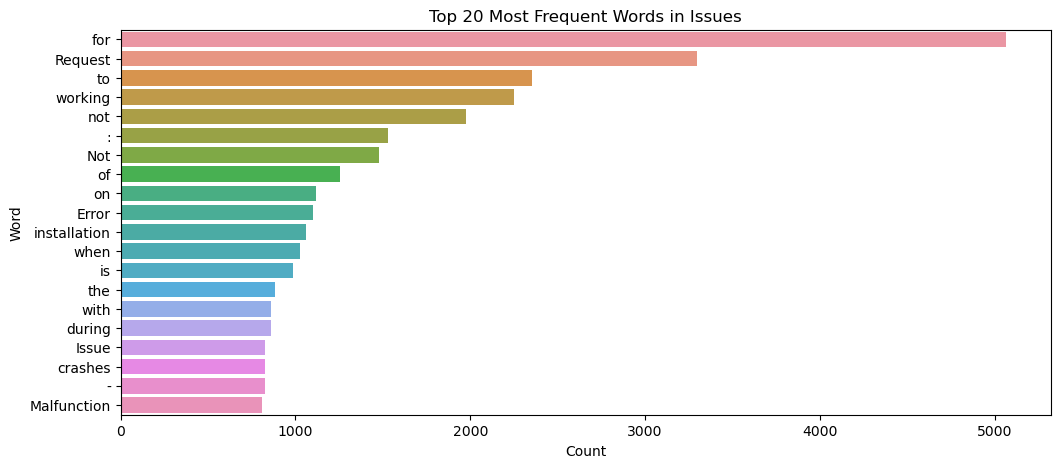

In [80]:
from collections import Counter

all_words = ' '.join(df['short_description']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12,5))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Frequent Words in Issues')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['short_description'])


In [82]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)


NearestNeighbors(metric='cosine')

In [83]:
def retrieve_similar_cases(query, top_k=5):
    # Convert query to TF-IDF
    query_vec = tfidf.transform([query])
    
    # Get nearest neighbors
    distances, indices = knn.kneighbors(query_vec, n_neighbors=top_k)

    results = []
    print("\nTop similar historical cases:\n")

    for idx, dist in zip(indices[0], distances[0]):
        similarity = 1 - dist  # convert cosine distance → similarity

        issue = df.iloc[idx]['short_description']
        solution = df.iloc[idx]['close_notes']

        # Print nicely
        print(f"Similarity: {similarity:.2f}")
        print(f"Issue: {issue}")
        print(f"Solution: {solution}")
        print("-" * 60)

        # Save result for optional GUI use
        results.append({
            "similarity": similarity,
            "issue": issue,
            "solution": solution
        })

    return results


In [84]:
retrieve_similar_cases("my email is not syncing")



Top similar historical cases:

Similarity: 0.41
Issue: Outlook not syncing with phone.
Solution: Issue was related to Outlook not syncing with the user's phone, leading to missed updates. Troubleshooting steps included: 1. Verified the account settings on both the desktop Outlook client and the mobile app. 2. Ensured that the latest version of Outlook was installed on the phone. 3. Checked and confirmed that both devices had a stable internet connection. 4. Re-signed into the Outlook app on the phone. 5. Synced the account manually on both devices to force synchronization. After these steps, the synchronization was restored, and updates were flowing correctly across all devices.
------------------------------------------------------------
Similarity: 0.41
Issue: Email application crashes frequently
Solution: Issue resolved by updating the email client to the latest version. Initial troubleshooting steps included checking for software updates, running the repair tool in the email clien

[{'similarity': 0.4113536938194928,
  'issue': 'Outlook not syncing with phone.',
  'solution': "Issue was related to Outlook not syncing with the user's phone, leading to missed updates. Troubleshooting steps included: 1. Verified the account settings on both the desktop Outlook client and the mobile app. 2. Ensured that the latest version of Outlook was installed on the phone. 3. Checked and confirmed that both devices had a stable internet connection. 4. Re-signed into the Outlook app on the phone. 5. Synced the account manually on both devices to force synchronization. After these steps, the synchronization was restored, and updates were flowing correctly across all devices."},
 {'similarity': 0.4093161998002739,
  'issue': 'Email application crashes frequently',
  'solution': "Issue resolved by updating the email client to the latest version. Initial troubleshooting steps included checking for software updates, running the repair tool in the email client, and ensuring that all ema

In [85]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Helper function to map NLTK POS tags to WordNet POS
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    words = text.split()
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # POS tagging for better lemmatization
    pos_tags = pos_tag(words)
    
    # Lemmatize
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    
    return ' '.join(lemmatized)

# Apply to dataframe
df['short_description'] = df['short_description'].apply(clean_text)
df['close_notes'] = df['close_notes'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\habde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\habde\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\habde\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [86]:
df.sample(5)

,short_description,close_notes,desc_len,note_len
25997,trello open session expire please log,investigated issue trello open error message i...,11,133
9513,zoom malfunction system io filenotfoundexcepti...,client experience issue access zoom receive sy...,10,97
11713,request xpatch 4 1 installation design team,review design team request installation xpatch...,8,62
7921,ping identity error,investigate report issue log ping identity unh...,3,133
1843,asana issue,check user asana account permission find neces...,2,115


c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


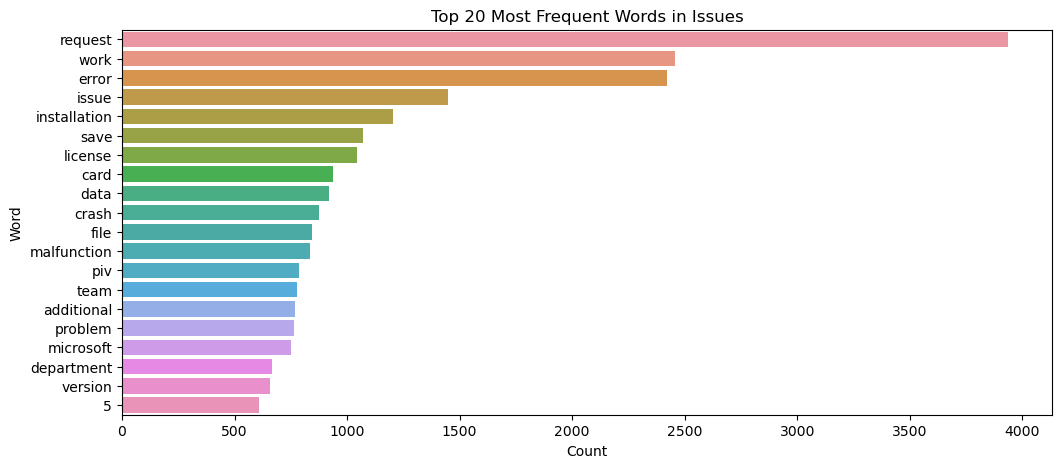

In [87]:
all_words = ' '.join(df['short_description']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12,5))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Frequent Words in Issues')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


In [88]:
df = df[df['close_notes'].str.split().apply(len) < 300]


In [89]:
print(df.shape)


(13744, 4)


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize solution text
tfidf_sol = TfidfVectorizer(stop_words='english', max_features=5000)
X_sol = tfidf_sol.fit_transform(df['close_notes'])

# Cluster solutions into 30 groups (you can adjust)
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['solution_cluster'] = kmeans.fit_predict(X_sol)

# Check cluster distribution
print(df['solution_cluster'].value_counts())


c:\Users\habde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


solution_cluster
7     1150
25    1051
11    1041
4      823
17     747
2      666
18     630
28     612
13     581
1      578
5      530
12     463
29     442
23     429
20     404
22     374
27     357
10     309
16     262
3      258
15     251
24     246
9      237
14     233
21     206
8      206
26     196
0      190
19     145
6      127
Name: count, dtype: int64


In [91]:
# ---- Unique values ----
print("Unique short_descriptions:")
unique_desc = df['short_description'].unique()
print(f"Total unique short_descriptions: {len(unique_desc)}\n")

print("Unique close_notes:")
unique_notes = df['close_notes'].unique()
print(f"Total unique close_notes: {len(unique_notes)}\n")

# ---- Frequency of each unique value ----
print("Top 10 most frequent short_descriptions:")
print(df['short_description'].value_counts().head(10), "\n")

print("Top 10 most frequent close_notes:")
print(df['close_notes'].value_counts().head(10))


Unique short_descriptions:
Total unique short_descriptions: 8808

Unique close_notes:
Total unique close_notes: 13595

Top 10 most frequent short_descriptions:
short_description
request piv card replacement due damage             38
activation request new piv card                     38
request renew piv card expiration                   21
temporary bypass piv card authentication request    21
unable access system use piv card                   20
microsoft intune work                               20
process new piv card request expire card            19
tenable nessus work                                 18
rsa secureid work                                   18
microsoft 365 suite work                            18
Name: count, dtype: int64 

Top 10 most frequent close_notes:
close_notes
implement required change contact customer let know change complete                                                                                                                                   

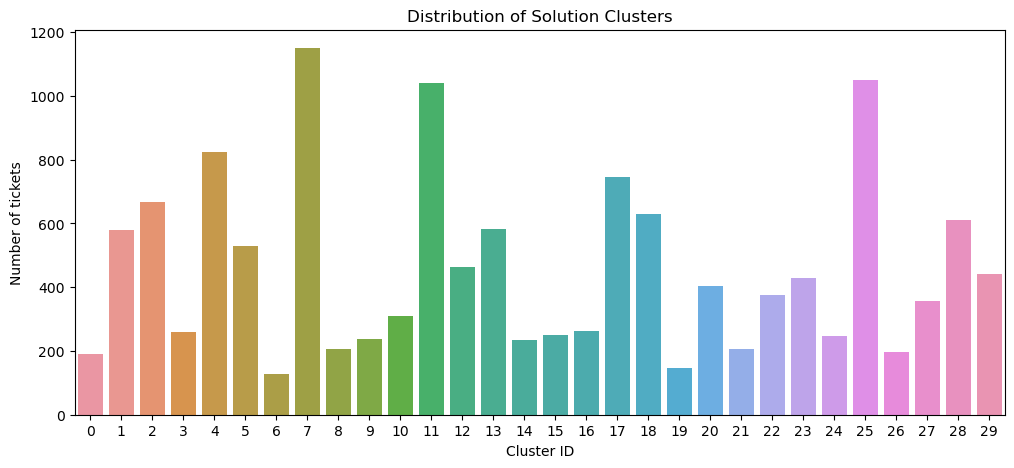

In [92]:
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x='solution_cluster', data=df)
plt.title('Distribution of Solution Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('Number of tickets')
plt.show()


In [93]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)


In [94]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Compute length of each short description
desc_lengths = df['short_description'].str.split().apply(len)

# Use the maximum length
max_len = desc_lengths.max()
print(f"Maximum description length: {max_len}")
# Tokenize issue descriptions
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df['short_description'])
X = tokenizer.texts_to_sequences(df['short_description'])

X = pad_sequences(X, maxlen=max_len, padding='post')

# Labels = cluster IDs
y = df['solution_cluster'].values


Maximum description length: 19


In [95]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)


Vocab size: 1494


In [96]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, Dropout, BatchNormalization, Layer
import tensorflow as tf

# Custom attention layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        self.u = self.add_weight(name='att_u', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        super(Attention, self).build(input_shape)
    
    def call(self, inputs):
        # u_t = tanh(W.h + b)
        u_t = tf.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        # attention scores
        att = tf.nn.softmax(tf.tensordot(u_t, self.u, axes=1), axis=1)
        # weighted sum of inputs
        output = tf.reduce_sum(inputs * att, axis=1)
        return output

# Input
inputs = Input(shape=(max_len,))

# Embedding
x = Embedding(vocab_size, 256, input_length=max_len)(inputs)
x = Dropout(0.4)(x)

# GRU with return_sequences=True (needed for attention)
x = GRU(256, return_sequences=True)(x)
x = Attention()(x)  # Apply attention
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Dense layers
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Output
outputs = Dense(num_clusters, activation='softmax')(x)

# Model
model = Model(inputs, outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


c:\Users\habde\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 19, 256)        │       382,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 19, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 19, 256)        │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_2 (Attention)         │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 918,814 (3.50 MB)

 Trainable params: 917,790 (3.50 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [97]:
from sklearn.model_selection import train_test_split

# X = tokenized/padded short_description
# y = solution_cluster (labels)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


In [98]:
X_train.shape

(12369, 19)

In [99]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.4007 - loss: 2.3209 - val_accuracy: 0.5084 - val_loss: 1.8225
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5690 - loss: 1.3424 - val_accuracy: 0.5971 - val_loss: 1.2374
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5876 - loss: 1.2431 - val_accuracy: 0.5876 - val_loss: 1.2253
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6068 - loss: 1.1832 - val_accuracy: 0.5993 - val_loss: 1.1864
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6080 - loss: 1.1507 - val_accuracy: 0.5985 - val_loss: 1.2151
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6138 - loss: 1.1433 - val_accuracy: 0.6065 - val_loss: 1.2354
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6232 - loss: 1.1030 - val_accuracy: 0.5942 - val_loss: 1.2178
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6207 - loss: 1.1000 - 

In [100]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5926 - loss: 1.1935
Validation Loss: 1.1851, Validation Accuracy: 0.6015


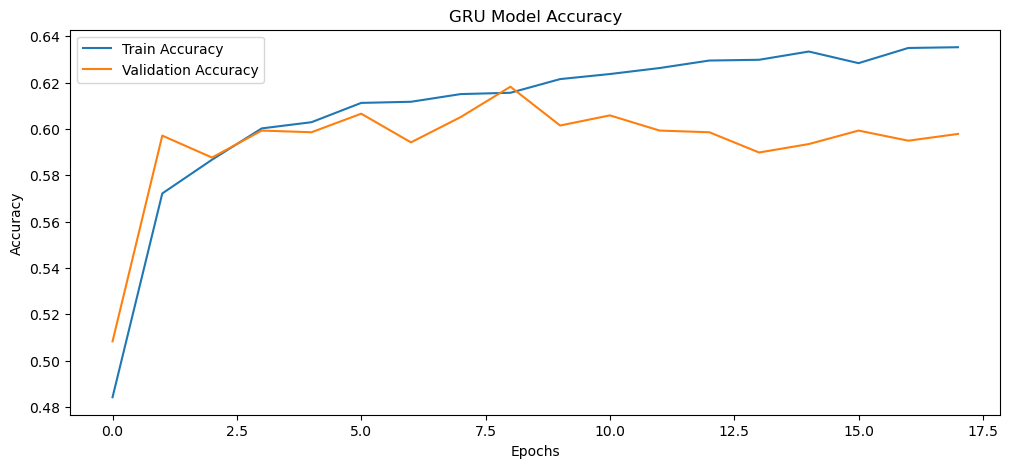

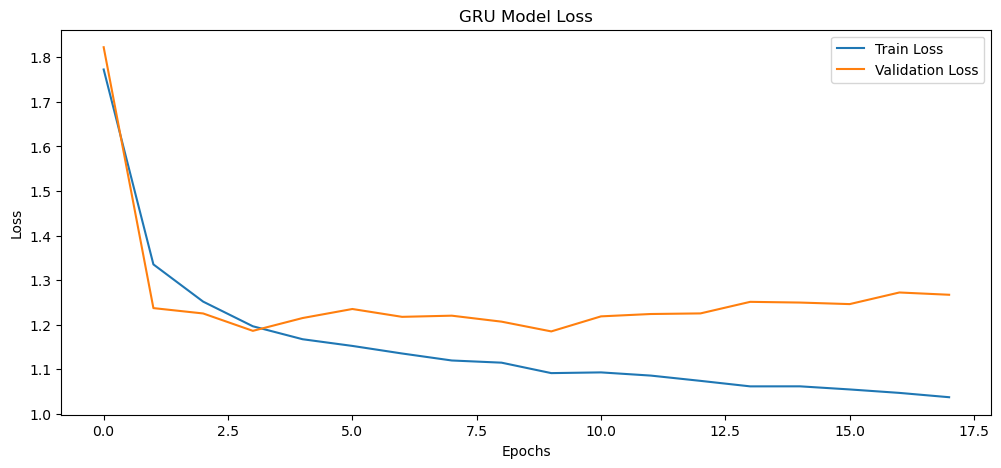

In [101]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [102]:
def predict_solution(issue_text):
    seq = tokenizer.texts_to_sequences([issue_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)
    cluster_id = pred.argmax()
    
    # Return the most frequent solution in that cluster
    solution = df[df['solution_cluster'] == cluster_id]['close_notes'].mode()[0]
    return solution


In [103]:
print(predict_solution("i forgot password"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
check customer login credential confirm error message fatal password authentication fail user admin indeed trigger informed customer issue likely due incorrect password entry account lock multiple fail attempt guide customer password reset process ensure could regain access nutanix enterprise cloud account reset password customer able log successfully without encounter error message provide additional tip create strong password advise customer avoid multiple fail login attempt prevent future account lockout customer express satisfaction resolution confirm could access system without issue ticket close problem resolve


In [104]:
import joblib

# ---- Save GRU Model ----
model.save("gru_solution_model.h5")

# ---- Save Tokenizer ----
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# ---- Save TF-IDF Vectorizer ----
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# ---- Save kNN CBR Model ----
joblib.dump(knn, "knn_cbr_model.pkl")

# ---- Save kMeans Clustering Model ----
joblib.dump(kmeans, "kmeans_cluster_model.pkl")

print("All models saved successfully.")


All models saved successfully.
